# Comparison with NHTS data to include in the supplement.

Developed by Siobhan Powell, 2022.

# Part 1: Study Survey Data

In [1]:
from sklearn.mixture import GaussianMixture
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture as GMM

Load and focus just on the Bay Area: 

In [4]:
dfper = pd.read_csv('/Users/siobhanpowell/Downloads/csv/perpub.csv')
dfper['HOUSE_PERSON'] = dfper['HOUSEID'].map(str) + '_' + dfper['PERSONID'].map(str)
df_survey = pd.read_csv('processed_trips.csv')
dfhh = pd.read_csv('/Users/siobhanpowell/Downloads/csv/hhpub.csv')
dftrip = pd.read_csv('/Users/siobhanpowell/Downloads/csv/trippub.csv')
dftrip['HOUSE_VEHICLE'] = dftrip['HOUSEID'].map(str) + '_' + dftrip['VEHID'].map(str)
dftrip['HOUSE_PERSON'] = dftrip['HOUSEID'].map(str) + '_' + dftrip['PERSONID'].map(str)
ca_list = dfper.loc[dfper['HOUSEID'].isin(dfhh[dfhh['HHSTATE']=='CA']['HOUSEID'].values)&(dfper['HOUSE_PERSON'].isin(df_survey.columns))]['HOUSE_PERSON'].values
dfper = dfper[dfper['HOUSE_PERSON'].isin(ca_list)].reset_index(drop=True)
df_survey = df_survey[ca_list]
dfhh = dfhh[dfhh['HHSTATE']=='CA'].reset_index(drop=True)
dftrip = dftrip[dftrip['HOUSE_PERSON'].isin(ca_list)].reset_index(drop=True)
dfhh_sub = dfhh[dfhh['HH_CBSA'].isin(['41860', '41940'])] # 41860=San Francisco-Oakland-Hayward, CA; 41940=San Jose-Sunnyvale-Santa Clara, CA

Divide into income groups: 

In [30]:
dfhh_sub['HHFAMINC'].value_counts()

 11    673
 10    439
 7     392
 6     380
 8     360
 9     259
 5     199
 4     161
 3     143
-7      84
 2      75
 1      73
-8       9
-9       1
Name: HHFAMINC, dtype: int64

In [31]:
print(len(dfhh_lowincome), len(dfhh_medincome), len(dfhh_highincome))

651 772 1731


In [5]:
dfhh_lowincome = dfhh_sub[dfhh_sub['HHFAMINC'].isin([1, 2, 3, 4, 5])] # 0 - 50
dfhh_medincome = dfhh_sub[dfhh_sub['HHFAMINC'].isin([6, 7])] # 50 - 100
dfhh_highincome = dfhh_sub[dfhh_sub['HHFAMINC'].isin([8, 9, 10, 11])] # 100 + 
# Note Speech method was slightly different: #  up to \$60,000, between \$60,000 and \$100,000, and greater than \$100,000.

Plot:

In [7]:
res = dftrip[dftrip['HOUSEID'].isin(dfhh_sub['HOUSEID'])].groupby('HOUSE_PERSON').agg('sum')['TRPMILES']

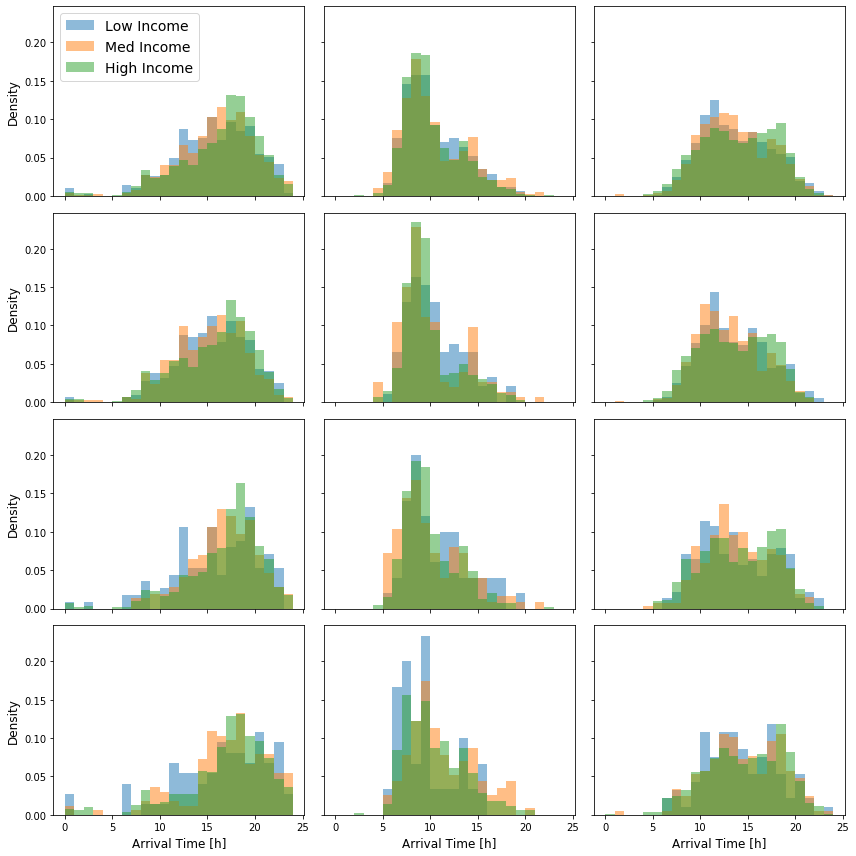

In [8]:
fig, axes = plt.subplots(4, 3, figsize=(12, 12), sharex=True, sharey=True)
labeling = ['Low Income', 'Med Income', 'High Income']
for i, tmp2 in enumerate([dfhh_lowincome, dfhh_medincome, dfhh_highincome]):
    # home
    tmp = dftrip.loc[(dftrip['HOUSEID'].isin(tmp2['HOUSEID']))&(dftrip['TRPTRANS'].isin([3, 4, 5, 6]))&(dftrip['WHYTRP1S'].isin([1]))]
    hour = (tmp['ENDTIME'] / 100).astype(int)
    minute = tmp['ENDTIME'] - 100*hour
    axes[0, 0].hist(hour+(1/60)*minute, bins=np.arange(0, 24.05, 1), alpha=0.5, density=True, label=labeling[i])
    # work
    tmp = dftrip.loc[(dftrip['HOUSEID'].isin(tmp2['HOUSEID']))&(dftrip['TRPTRANS'].isin([3, 4, 5, 6]))&(dftrip['WHYTRP1S'].isin([10]))]
    hour = (tmp['ENDTIME'] / 100).astype(int)
    minute = tmp['ENDTIME'] - 100*hour
    axes[0, 1].hist(hour+(1/60)*minute, bins=np.arange(0, 24.05, 1), alpha=0.5, density=True, label=labeling[i])
    # home
    tmp = dftrip.loc[(dftrip['HOUSEID'].isin(tmp2['HOUSEID']))&(dftrip['TRPTRANS'].isin([3, 4, 5, 6]))&(dftrip['WHYTRP1S'].isin([20, 30, 40, 50, 80]))]
    hour = (tmp['ENDTIME'] / 100).astype(int)
    minute = tmp['ENDTIME'] - 100*hour
    axes[0, 2].hist(hour+(1/60)*minute, bins=np.arange(0, 24.05, 1), alpha=0.5, density=True, label=labeling[i])
for j in range(3):
    axes[3, j].set_xlabel('Arrival Time [h]', fontsize=12)
for k in range(4):
    axes[k, 0].set_ylabel('Density', fontsize=12)
axes[0, 0].legend(labels=['Low Income', 'Med Income', 'High Income'], loc='upper left', fontsize=14)


for income_list in [[1, 2, 3, 4, 5], [6, 7], [8, 9, 10, 11]]:
    tmp3_people = dfper.loc[(dfper['HOUSE_PERSON'].isin(res.loc[(res<25)].keys()))&(dfper['HOUSEID'].isin(dfhh_sub[dfhh_sub['HHFAMINC'].isin(income_list)]['HOUSEID'].values))]
    tmp2 = dftrip.loc[dftrip['HOUSE_PERSON'].isin(tmp3_people['HOUSE_PERSON'].values)]
    tmp = tmp2.loc[(tmp2['TRPTRANS'].isin([3, 4, 5, 6]))&(tmp2['WHYTRP1S'].isin([1]))]
    hour = (tmp['ENDTIME'] / 100).astype(int)
    minute = tmp['ENDTIME'] - 100*hour
    axes[1, 0].hist(hour+(1/60)*minute, bins=np.arange(0, 24.05, 1), alpha=0.5, density=True)
    tmp = tmp2.loc[(tmp2['TRPTRANS'].isin([3, 4, 5, 6]))&(tmp2['WHYTRP1S'].isin([10]))]
    hour = (tmp['ENDTIME'] / 100).astype(int)
    minute = tmp['ENDTIME'] - 100*hour
    axes[1, 1].hist(hour+(1/60)*minute, bins=np.arange(0, 24.05, 1), alpha=0.5, density=True)
    tmp = tmp2.loc[(tmp2['TRPTRANS'].isin([3, 4, 5, 6]))&(tmp2['WHYTRP1S'].isin([20, 30, 40, 50, 80]))]
    hour = (tmp['ENDTIME'] / 100).astype(int)
    minute = tmp['ENDTIME'] - 100*hour
    axes[1, 2].hist(hour+(1/60)*minute, bins=np.arange(0, 24.05, 1), alpha=0.5, density=True)

for income_list in [[1, 2, 3, 4, 5], [6, 7], [8, 9, 10, 11]]:
    tmp3_people = dfper.loc[(dfper['HOUSE_PERSON'].isin(res.loc[(res>=25)&(res<50)].keys()))&(dfper['HOUSEID'].isin(dfhh_sub[dfhh_sub['HHFAMINC'].isin(income_list)]['HOUSEID'].values))]
    tmp2 = dftrip.loc[dftrip['HOUSE_PERSON'].isin(tmp3_people['HOUSE_PERSON'].values)]
    tmp = tmp2.loc[(tmp2['TRPTRANS'].isin([3, 4, 5, 6]))&(tmp2['WHYTRP1S'].isin([1]))]
    hour = (tmp['ENDTIME'] / 100).astype(int)
    minute = tmp['ENDTIME'] - 100*hour
    axes[2, 0].hist(hour+(1/60)*minute, bins=np.arange(0, 24.05, 1), alpha=0.5, density=True)
    tmp = tmp2.loc[(tmp2['TRPTRANS'].isin([3, 4, 5, 6]))&(tmp2['WHYTRP1S'].isin([10]))]
    hour = (tmp['ENDTIME'] / 100).astype(int)
    minute = tmp['ENDTIME'] - 100*hour
    axes[2, 1].hist(hour+(1/60)*minute, bins=np.arange(0, 24.05, 1), alpha=0.5, density=True)
    tmp = tmp2.loc[(tmp2['TRPTRANS'].isin([3, 4, 5, 6]))&(tmp2['WHYTRP1S'].isin([20, 30, 40, 50, 80]))]
    hour = (tmp['ENDTIME'] / 100).astype(int)
    minute = tmp['ENDTIME'] - 100*hour
    axes[2, 2].hist(hour+(1/60)*minute, bins=np.arange(0, 24.05, 1), alpha=0.5, density=True)

for income_list in [[1, 2, 3, 4, 5], [6, 7], [8, 9, 10, 11]]:
    tmp3_people = dfper.loc[(dfper['HOUSE_PERSON'].isin(res.loc[(res>=50)].keys()))&(dfper['HOUSEID'].isin(dfhh_sub[dfhh_sub['HHFAMINC'].isin(income_list)]['HOUSEID'].values))]
    tmp2 = dftrip.loc[dftrip['HOUSE_PERSON'].isin(tmp3_people['HOUSE_PERSON'].values)]
    tmp = tmp2.loc[(tmp2['TRPTRANS'].isin([3, 4, 5, 6]))&(tmp2['WHYTRP1S'].isin([1]))]
    hour = (tmp['ENDTIME'] / 100).astype(int)
    minute = tmp['ENDTIME'] - 100*hour
    axes[3, 0].hist(hour+(1/60)*minute, bins=np.arange(0, 24.05, 1), alpha=0.5, density=True)
    tmp = tmp2.loc[(tmp2['TRPTRANS'].isin([3, 4, 5, 6]))&(tmp2['WHYTRP1S'].isin([10]))]
    hour = (tmp['ENDTIME'] / 100).astype(int)
    minute = tmp['ENDTIME'] - 100*hour
    axes[3, 1].hist(hour+(1/60)*minute, bins=np.arange(0, 24.05, 1), alpha=0.5, density=True)
    tmp = tmp2.loc[(tmp2['TRPTRANS'].isin([3, 4, 5, 6]))&(tmp2['WHYTRP1S'].isin([20, 30, 40, 50, 80]))]
    hour = (tmp['ENDTIME'] / 100).astype(int)
    minute = tmp['ENDTIME'] - 100*hour
    axes[3, 2].hist(hour+(1/60)*minute, bins=np.arange(0, 24.05, 1), alpha=0.5, density=True)


plt.tight_layout()
# plt.savefig('fig_revision_surveyarrivalbyincome.png', bbox_inches='tight')
plt.savefig('fig_revision_surveyarrivalbyincome.pdf', bbox_inches='tight')
plt.show()

# Part 2: Comparison with Charging Data

Study session windows to rebuild model using only charging data feasible for these driver travel patterns.

In [ ]:
s3_folder_location = ''

In [ ]:
df = pd.read_csv(s3_folder_location+'/sessions2019.csv', index_col=0)
labeled_drivers = pd.read_csv(s3_folder_location+'/largeN_DriverAccessPricing_revised_n136_20210818.csv', index_col=0)
for i in np.arange(0, 136):
    df.loc[df[df['Driver ID'].isin(labeled_drivers[labeled_drivers['Agglom Cluster Number']==i]['Unique Driver ID'].values)].index, 'Agglom Cluster Number'] = i
df = df[~df['Agglom Cluster Number'].isna()].reset_index(drop=True).copy(deep=True)

In [ ]:
df['start_15minind'] = (df['start_seconds'] / (15*60)).astype(int)
# normal
inds = df[df['start_seconds'] + df['Charging Time (secs)'] < (24*60*60)].index
df.loc[inds, 'end_15minind'] = np.ceil((df['start_seconds'] + df['Charging Time (secs)'])/(15*60))
# overnight
inds = df[df['start_seconds'] + df['Charging Time (secs)'] >= (24*60*60)].index
df.loc[inds, 'end_15minind'] = np.ceil((df['start_seconds'] + df['Charging Time (secs)'] - (24*60*60))/(15*60))
# more than a day
inds = df[df['Charging Time (secs)'] > (24*60*60)].index
df.loc[inds, 'end_15minind'] = df.loc[inds, 'start_15minind']-1
df['end_15minind'] = df['end_15minind'].astype(int)
df['Driver_day_time'] = df['Driver ID'].map(str) + '_' + df['start_day'].map(str) + '_' + df['start_seconds'].map(str)

In [ ]:
session_arrays_all = {i:{'home':None, 'work':None, 'public':None} for i in np.arange(0, 136)}
session_arrays_inds = {i:{'home':None, 'work':None, 'public':None} for i in np.arange(0, 136)}
for clustnum in np.arange(0, 136):
    subset = df[df['Agglom Cluster Number']==clustnum].copy(deep=True)
    
#     for weekday, weekday_list in {'weekday':[0,1,2,3,4], 'weekend':[5,6]}.items():
    # all weekday in this survey data for now
        
    for segment, category_list in {'work':['Workplace'], 
                                   'home':['Single family residential', 'Multifamily Home Service'], 
                                   'public':['Healthcare', 'Government (Fed, State)', 'Retail', 'Multifamily Commercial', 'Parks and Recreation', 'Education', 'Fleet', 'Utility', 'Parking', 'Municipal', 'Hospitality']}.items():
        subsub = subset[subset['POI Category'].isin(category_list)&(subset['start_weekday'].isin([0,1,2,3,4]))]

        session_array = np.zeros((96, len(subsub)))
        for i, idx in enumerate(subsub.index):
            if subset.loc[idx, 'end_15minind'] > subset.loc[idx, 'start_15minind']:
                session_array[np.arange(subset.loc[idx, 'start_15minind'], subset.loc[idx, 'end_15minind']), i] = 1
            elif subset.loc[idx, 'end_15minind'] == subset.loc[idx, 'start_15minind']:
                session_array[subset.loc[idx, 'start_15minind'], i] = 1
            else:
                session_array[np.arange(0, subset.loc[idx, 'end_15minind']), i] = 1
                session_array[np.arange(subset.loc[idx, 'start_15minind'], 96), i] = 1
        session_arrays_all[clustnum][segment] = session_array
        session_arrays_inds[clustnum][segment] = subsub.index.values

In [ ]:
df_survey_all = {'home':None, 'work':None, 'public':None}

# dfhh_sub = dfhh[dfhh['HH_CBSA'].isin(['41860', '41940'])]
df_survey_sub = df_survey.loc[:, dfper[dfper['HOUSEID'].isin(dfhh_sub['HOUSEID'].values)]['HOUSE_PERSON'].values].copy(deep=True)
for val, cat in {0:'home', 1:'work', 2:'public'}.items():
    print(cat)
    temp = pd.DataFrame(np.zeros(df_survey_sub.shape), columns=df_survey_sub.columns)
    for i in temp.index:
        temp.loc[i, df_survey_sub.loc[i][df_survey_sub.loc[i] == val].index.values] = 1
    temp = temp.loc[:, (temp.sum(axis=0) != 0).index.values].copy(deep=True)
    df_survey_all[cat] = temp

In [ ]:
income_names = ['low', 'med', 'high']
df_cols = ['Driver ID', 'start_datetime', 'start_weekday', 'start_seconds', 'Agglom Cluster Number', 'Max Power', 'Energy (kWh)', 'Session Time (secs)', 'Charging Time (secs)', 'POI Category']
for clustnum in range(136):
#     for cat in ['home']:#, 'public', 'work']:
    for cat in ['home', 'public', 'work']:
        print('Cluster ', str(clustnum), ' Category ', cat)
        if np.shape(session_arrays_all[clustnum][cat])[1] > 0:
            for k, income_list in enumerate([[1, 2, 3, 4, 5], [6, 7], [8, 9, 10, 11]]):
                people_list = dfper.loc[(dfper['HOUSEID'].isin(dfhh_sub[dfhh_sub['HHFAMINC'].isin(income_list)]['HOUSEID'].values))]['HOUSE_PERSON'].values
                print(income_names[k]+'; Number of people: ', len(people_list))
                inds = None
                for i, test_driver in enumerate(people_list):
                    if df_survey_all[cat][test_driver].sum() > 0:
                        comp = (np.sum((np.repeat(df_survey_all[cat][test_driver].values.reshape(-1,1), np.shape(session_arrays_all[clustnum][cat])[1], axis=1) >= session_arrays_all[clustnum][cat]), axis=0)==96)
                        if inds is not None:
                            inds = np.concatenate((np.array(inds), np.array(session_arrays_inds[clustnum][cat][comp]).ravel()))
                            inds = list(set(inds))
                        else:
                            inds = list(set(session_arrays_inds[clustnum][cat][comp]))

                processed_feas_df = process_df(df.loc[inds, df_cols])
                processed_feas_df = processed_feas_df[processed_feas_df['weekend']=='weekday']
                if cat == 'home':
                    processed_feas_df = processed_feas_df[processed_feas_df['fast']=='slow']
                    mud_df = processed_feas_df[processed_feas_df['location']=='mud'].copy(deep=True).reset_index(drop=True)
                    res_df = processed_feas_df[processed_feas_df['location']=='home'].copy(deep=True).reset_index(drop=True)

                    name_str = 'Data/nhts_comparison/'+income_names[k]+'/weekday'+'_'+'home_l2'+'_'+str(clustnum)+'.p'
                    fit_gmm(res_df, name_str)
                    name_str = 'Data/nhts_comparison/'+income_names[k]+'/weekday'+'_'+'mud_l2'+'_'+str(clustnum)+'.p'
                    fit_gmm(mud_df, name_str)
                elif cat == 'public':
                    l2_df = processed_feas_df.loc[(processed_feas_df['location']=='other')&(processed_feas_df['fast']=='slow')].copy(deep=True).reset_index(drop=True)
                    l3_df = processed_feas_df.loc[(processed_feas_df['location']=='other')&(processed_feas_df['fast']=='fast')].copy(deep=True).reset_index(drop=True)

                    name_str = 'Data/nhts_comparison/'+income_names[k]+'/weekday'+'_'+'public_l2'+'_'+str(clustnum)+'.p'
                    fit_gmm(l2_df, name_str)
                    name_str = 'Data/nhts_comparison/'+income_names[k]+'/weekday'+'_'+'public_l3'+'_'+str(clustnum)+'.p'
                    fit_gmm(l3_df, name_str)
                elif cat == 'work':
                    processed_feas_df = processed_feas_df[processed_feas_df['fast']=='slow']
                    work_df = processed_feas_df[processed_feas_df['location']=='work'].copy(deep=True).reset_index(drop=True)

                    name_str = 'Data/nhts_comparison/'+income_names[k]+'/weekday'+'_'+'work_l2'+'_'+str(clustnum)+'.p'
                    fit_gmm(work_df, name_str)
                else:
                    print('Error')
            

## Look at the results
### Build profile for Santa Clara County using all and subset GMMs

In [9]:
def plot(ax, load_segments_array, load_segments_dict, data, save_str=None, legend=True, ylim=None, yticks=None, ylabel=True):
    
    x = (1/60)*np.arange(0, 1440)
    mark = np.zeros(np.shape(x))
    patterns = {'Residential L2':'/', 'MUD L2':'///', 
                'Workplace L2':'\\', 'Public L2':'x', 'Public DCFC':'.'}#, 'Public DCFC':'*'}
    renaming = {key:key for key in load_segments_dict.keys()}
    renaming['Residential L2'] = 'SFH L2'

    scaling = 1 / 1000
    unit = 'MW'
    if np.max(scaling * np.sum(load_segments_array, axis=1)) > 1000:
        scaling = (1 / 1000) * (1 / 1000)
        unit = 'GW'
#     plt.figure(figsize=(8, 5))
    for key, val in load_segments_dict.items():
        if key != 'Residential L1':
            ax.plot(x, scaling * (mark + val), color=data.colours[key])
            ax.fill_between(x, scaling * mark, scaling * (mark + val), label=renaming[key], 
                            hatch=patterns[key], facecolor=data.colours[key], edgecolor='grey')#color=data.colours[key], )
            mark += val
    ax.plot(x, scaling * mark, 'k')
    if legend:
        ax.legend(fontsize=14, loc='upper left')
    ax.set_xlim([0, np.max(x)])
    if ylim is None:
        ax.set_ylim([0, 1.1 * np.max(scaling * mark)])
    else:
        ax.set_ylim([0, ylim])
    if ylabel:
        ax.set_ylabel(unit, fontsize=14)
    ax.set_xlabel('Hour', fontsize=14)
    ax.set_xticks([0, 4, 8, 12, 16, 20])
    ax.set_xticklabels([0, 4, 8, 12, 16, 20], fontsize=14)
    if yticks is not None:
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticks, fontsize=14)
#     else:
#         ax.set_yticks([])

    ax.set_axisbelow(True)        
    ax.grid(alpha=0.7, zorder=2)

    if save_str is not None:
        plt.tight_layout()
        plt.savefig(save_str+'.pdf', bbox_inches='tight')
        plt.savefig(save_str+'.png', bbox_inches='tight')
        plt.show()
    else:
        return ax

In [10]:
import os
os.chdir('../RunningModel/')

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import boto3
import numpy as np
import pickle
import time

from speech_classes import SPEECh
from speech_classes import SPEEChGeneralConfiguration
from speech_classes import LoadProfile
from speech_classes import Plotting
from speech_classes import DataSetConfigurations


/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:425: RuntimeWarning: covariance is not positive-semidefinite.
  for (mean, covariance, sample) in zip(


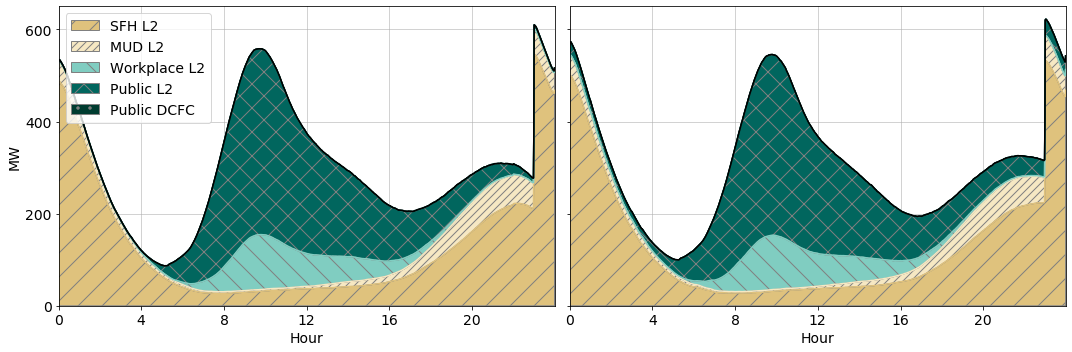

MAPE:  0.0483


In [27]:
data = DataSetConfigurations(data_set='CP136')
data.gmm_subfolder = 'nhts_comparison/low/'
speech = SPEECh(data=data, penetration_level=1.0, outside_california=True, states=['CA'])
speech.pdih_data = pd.read_csv(speech.data.folder + 'pdih_us_counties.csv', index_col=0)
ind = speech.pdih_data.loc[speech.pdih_data['Name']=='Santa Clara County, CA'].index
# speech.pdih_data.loc[ind, ['P_LowIncome', 'P_MedIncome', 'P_HighIncome']]#.sum(axis=1)
speech.pdih_data.loc[ind, 'P_LowIncome'] = 1.0
speech.pdih_data.loc[ind, 'P_MedIncome'] = 0
speech.pdih_data.loc[ind, 'P_HighIncome'] = 0

speech.pa_ih(scenario='HighHome')
speech.pg_multiple_regions(region_type='Name', region_value_list=['Santa Clara County, CA'])
config = SPEEChGeneralConfiguration(speech, remove_timers=False)#, utility_region=utility_region)
config.run_all(verbose=False, weekday='weekday')


data2 = DataSetConfigurations(data_set='CP136')
# data.gmm_subfolder = 'nhts_comparison/low/'
speech2 = SPEECh(data=data2, penetration_level=1.0, outside_california=True, states=['CA'])
speech2.pdih_data = pd.read_csv(speech2.data.folder + 'pdih_us_counties.csv', index_col=0)
ind = speech2.pdih_data.loc[speech2.pdih_data['Name']=='Santa Clara County, CA'].index
# speech.pdih_data.loc[ind, ['P_LowIncome', 'P_MedIncome', 'P_HighIncome']]#.sum(axis=1)
speech2.pdih_data.loc[ind, 'P_LowIncome'] = 1.0
speech2.pdih_data.loc[ind, 'P_MedIncome'] = 0
speech2.pdih_data.loc[ind, 'P_HighIncome'] = 0

speech2.pa_ih(scenario='HighHome')
speech2.pg_multiple_regions(region_type='Name', region_value_list=['Santa Clara County, CA'])
config2 = SPEEChGeneralConfiguration(speech2, remove_timers=False)#, utility_region=utility_region)
config2.run_all(verbose=False, weekday='weekday')

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
axes[0] = plot(axes[0], config.total_load_segments, config.total_load_dict, data, ylabel=True, ylim=650, yticks=[0, 200, 400, 600])#, 800, 1000])
axes[1] = plot(axes[1], config2.total_load_segments, config2.total_load_dict, data2, ylabel=False, ylim=650, legend=False, save_str='../Plotting/fig_revision_lowincome_santaclara_basecase')
print('MAPE: ', np.round(np.mean(np.abs(config.total_load_segments.sum(axis=1) - config2.total_load_segments.sum(axis=1)) / config2.total_load_segments.sum(axis=1)), 4))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:425: RuntimeWarning: covariance is not positive-semidefinite.
  for (mean, covariance, sample) in zip(


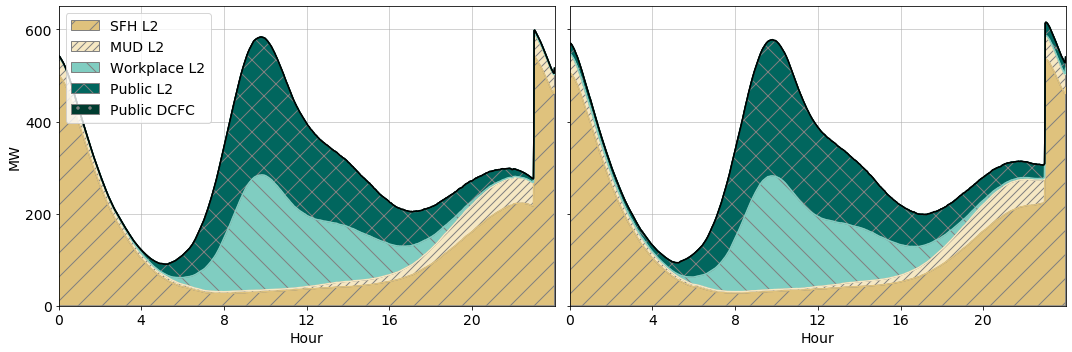

MAPE:  0.0326


In [28]:
data = DataSetConfigurations(data_set='CP136')
data.gmm_subfolder = 'nhts_comparison/med/'
speech = SPEECh(data=data, penetration_level=1.0, outside_california=True, states=['CA'])
speech.pdih_data = pd.read_csv(speech.data.folder + 'pdih_us_counties.csv', index_col=0)
ind = speech.pdih_data.loc[speech.pdih_data['Name']=='Santa Clara County, CA'].index
# speech.pdih_data.loc[ind, ['P_LowIncome', 'P_MedIncome', 'P_HighIncome']]#.sum(axis=1)
speech.pdih_data.loc[ind, 'P_LowIncome'] = 0
speech.pdih_data.loc[ind, 'P_MedIncome'] = 1.0
speech.pdih_data.loc[ind, 'P_HighIncome'] = 0

speech.pa_ih(scenario='HighHome')
speech.pg_multiple_regions(region_type='Name', region_value_list=['Santa Clara County, CA'])
config = SPEEChGeneralConfiguration(speech, remove_timers=False)#, utility_region=utility_region)
config.run_all(verbose=False, weekday='weekday')


data2 = DataSetConfigurations(data_set='CP136')
# data.gmm_subfolder = 'nhts_comparison/med/'
speech2 = SPEECh(data=data2, penetration_level=1.0, outside_california=True, states=['CA'])
speech2.pdih_data = pd.read_csv(speech2.data.folder + 'pdih_us_counties.csv', index_col=0)
ind = speech2.pdih_data.loc[speech2.pdih_data['Name']=='Santa Clara County, CA'].index
# speech.pdih_data.loc[ind, ['P_LowIncome', 'P_MedIncome', 'P_HighIncome']]#.sum(axis=1)
speech2.pdih_data.loc[ind, 'P_LowIncome'] = 0
speech2.pdih_data.loc[ind, 'P_MedIncome'] = 1.0
speech2.pdih_data.loc[ind, 'P_HighIncome'] = 0

speech2.pa_ih(scenario='HighHome')
speech2.pg_multiple_regions(region_type='Name', region_value_list=['Santa Clara County, CA'])
config2 = SPEEChGeneralConfiguration(speech2, remove_timers=False)#, utility_region=utility_region)
config2.run_all(verbose=False, weekday='weekday')

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
axes[0] = plot(axes[0], config.total_load_segments, config.total_load_dict, data, ylabel=True, ylim=650, yticks=[0, 200, 400, 600])
axes[1] = plot(axes[1], config2.total_load_segments, config2.total_load_dict, data2, ylabel=False, ylim=650, legend=False, save_str='../Plotting/fig_revision_medincome_santaclara_basecase')
print('MAPE: ', np.round(np.mean(np.abs(config.total_load_segments.sum(axis=1) - config2.total_load_segments.sum(axis=1)) / config2.total_load_segments.sum(axis=1)), 4))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:425: RuntimeWarning: covariance is not positive-semidefinite.
  for (mean, covariance, sample) in zip(


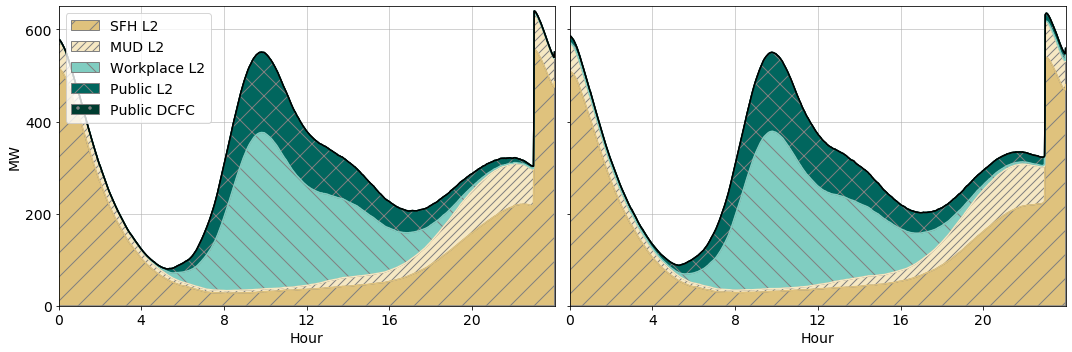

MAPE:  0.0324


In [29]:
data = DataSetConfigurations(data_set='CP136')
data.gmm_subfolder = 'nhts_comparison/high/'
speech = SPEECh(data=data, penetration_level=1.0, outside_california=True, states=['CA'])
speech.pdih_data = pd.read_csv(speech.data.folder + 'pdih_us_counties.csv', index_col=0)
ind = speech.pdih_data.loc[speech.pdih_data['Name']=='Santa Clara County, CA'].index
# speech.pdih_data.loc[ind, ['P_LowIncome', 'P_MedIncome', 'P_HighIncome']]#.sum(axis=1)
speech.pdih_data.loc[ind, 'P_LowIncome'] = 0
speech.pdih_data.loc[ind, 'P_MedIncome'] = 0
speech.pdih_data.loc[ind, 'P_HighIncome'] = 1.0

speech.pa_ih(scenario='HighHome')
speech.pg_multiple_regions(region_type='Name', region_value_list=['Santa Clara County, CA'])
config = SPEEChGeneralConfiguration(speech, remove_timers=False)#, utility_region=utility_region)
config.run_all(verbose=False, weekday='weekday')


data2 = DataSetConfigurations(data_set='CP136')
# data.gmm_subfolder = 'nhts_comparison/high/'
speech2 = SPEECh(data=data2, penetration_level=1.0, outside_california=True, states=['CA'])
speech2.pdih_data = pd.read_csv(speech2.data.folder + 'pdih_us_counties.csv', index_col=0)
ind = speech2.pdih_data.loc[speech2.pdih_data['Name']=='Santa Clara County, CA'].index
# speech.pdih_data.loc[ind, ['P_LowIncome', 'P_MedIncome', 'P_HighIncome']]#.sum(axis=1)
speech2.pdih_data.loc[ind, 'P_LowIncome'] = 0
speech2.pdih_data.loc[ind, 'P_MedIncome'] = 0
speech2.pdih_data.loc[ind, 'P_HighIncome'] = 1.0

speech2.pa_ih(scenario='HighHome')
speech2.pg_multiple_regions(region_type='Name', region_value_list=['Santa Clara County, CA'])
config2 = SPEEChGeneralConfiguration(speech2, remove_timers=False)#, utility_region=utility_region)
config2.run_all(verbose=False, weekday='weekday')

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
axes[0] = plot(axes[0], config.total_load_segments, config.total_load_dict, data, ylabel=True, ylim=650, yticks=[0, 200, 400, 600])#, 800, 1000])
axes[1] = plot(axes[1], config2.total_load_segments, config2.total_load_dict, data2, ylabel=False, ylim=650, legend=False, save_str='../Plotting/fig_revision_highincome_santaclara_basecase')
print('MAPE: ', np.round(np.mean(np.abs(config.total_load_segments.sum(axis=1) - config2.total_load_segments.sum(axis=1)) / config2.total_load_segments.sum(axis=1)), 4))